<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/HW4/chchchchanges_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




  Created wheel for ruptures: filename=ruptures-1.0.3-cp36-none-any.whl size=55251 sha256=452b3852c12b1e46973ca1d36e7b720e8e6d423cb9a897e1082fe9bb3438f951
  Stored in directory: /root/.cache/pip/wheels/8b/a2/15/6e7b600d1415d6d3e746e3004dc23eef3bf7778d35e6afebac
Successfully built ruptures
Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

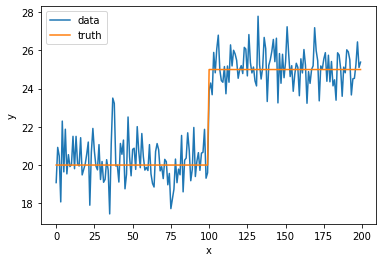

In [0]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

Figure 1: simulated data showing a point of change in mean. The data is Gaussiand distributed on both sides of the point of change with standard deviation 1 and mean respectively: 20 (before) and 25 (after)

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [0]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.20, mean after: 25.15


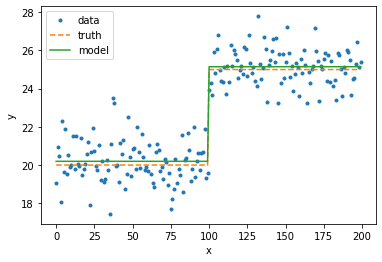

In [0]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 2: The data (blue point), true generative process (orange dashed line, as described in Figure 1) and Point-Of-Change model (green) which simply sets to the only point of change in the series the point that maximizes the difference before and after the point of change. The model finds the correct point of change (and the correct mean before and after, with a very small error of a single point above the mean in the first distribution which is included in the second section of the data by the model. 

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa4#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [0]:
def poc_mse(y):
    "https://variation.com/wp-content/uploads/change-point-analyzer/change-point-analysis-a-powerful-new-tool-for-detecting-changes.pdf"
    mse = np.inf
    f = np.nanmean
    N= len(y)
    for i in range(1, N):
        mse_here = np.sum((y[:i] - f(y[:i]))**2) +  np.sum((y[i:] - f(y[i:]))**2)
        if mse_here < mse:
            mse = mse_here
            poc = i
            before, after = f(y[:i]), f(y[i:])

    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))


poc: 100.00, mean before: 20.20, mean after: 25.15


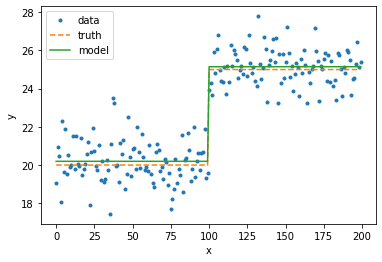

In [0]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 3: same as figure 2 but efor the moint of change that minimized the mean square error between the before and after the single point of change. There are minimal differences in the result compared to the POC model based on difference in the mean.

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [0]:
mu1, mu2 = 20, 25
s2 = 4
ys = np.concatenate([np.random.randn(100)  + mu1 , np.random.randn(100) * s2 + mu1])

In [0]:
def maxdiff(y, sigma=False):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    if sigma :
        f = np.nanstd
    for i in range(1, N):
        diff_here = np.abs(f(y[i:]) -  f(y[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(y[:i]), f(y[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ys, sigma=True)))


poc: 100.00, mean before: 0.95, mean after: 3.87


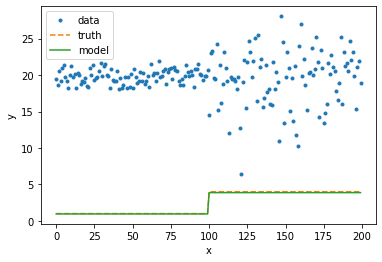

In [0]:
pl.plot(x, ys, '.', label="data")
pl.plot(range(200), [1] * 100 + [s2] * 100, '--', label="truth")
pl.xlabel('x')
pl.ylabel('y');

poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, [before] * poc + [after] * (len(ys) - poc), label="model")
pl.legend()

Figure 4: Detection of point of change in variance the data is generate as two concatenated Gaussian distribution with same mean (20) but different standard deviation (0.95 and 3.87). The generative model is labeled "truth" and shown as an orange dashed line, and in green the result of applying a POC detection algorithm that maximized the difference in variance before and after the POC is shown. For the model and the generative process, the value of the y-axis indcates the variance in the sample, while for the data (blue dots) the value indicate the dependent variable.  The model correctly identifies the POC. 

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

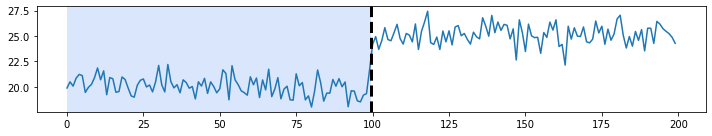

In [0]:
# detection
algo = rpt.Pelt(model="rbf").fit(ym)
result = algo.predict(pen=10)

# display
rpt.display(ym, [100], result)
pl.show()

Figure 5: the Rapture implementation of the POC applied to the first synthetic dataset of 2 gaussian distributions with different means (Fig 1, 2, 3)

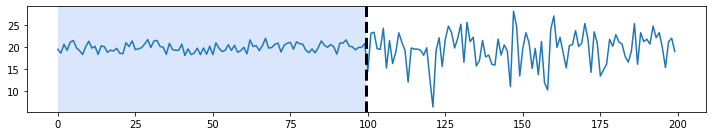

In [0]:
# detection
algo = rpt.Pelt(model="rbf").fit(ys)
result = algo.predict(pen=10)

# display
rpt.display(ys, [100], result)
pl.show()

Figure 5: the Rapture implementation of the POC applied to the first synthetic dataset of 2 gaussian distributions with different variances (Fig 4). 


The rapture package correctly identifies the point of change in both synthetic datasets (Figure 5 and 6)

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [0]:
eq1 = pd.read_csv("http://fbb.space/mltsa/LALNeq.csv", index_col=0)
eq1.describe()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [0]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively. 




In [0]:
algo = rpt.Dynp(model="rbf", min_size=100).fit(eq1.acoustic_data.values[:10000])
result = algo.predict(n_bkps=1)



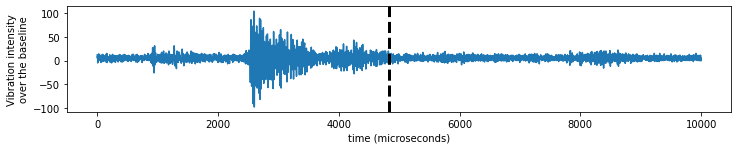

In [0]:
# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.ylabel("Vibration intensity\nover the baseline")
plt.xlabel("time (seconds)")
plt.show()


Figure 6: Earthquake data obtained from the LANL-Earthquake-Prediction Kaggle challenge: these are lab-simulated "earthquakes". The x-axis simply indicates the array inxdex, but it can be interpreted as seconds from the beginning of the time series The data is a single consecutive segment of 10000 datapoints extracted from the beginning of the much longer time series generated by extracting 1/100th of 1 of the 1000 segments in the original https://www.kaggle.com/c/LANL-Earthquake-Prediction/data data and stored in http://fbb.space/mltsa/LALNeq.csv (accessed Feb 28). The Rapture algorithm is run here with a minimum size constrain (smalled chunk allowed to be surrounded by POCs) of 100 data points, with Dynamic programming algorithm which is very computationally expensive (O(Kn^2), where K is the number of change points and n the number of samples) because it computes the cost of all subsequences of a given signal. The cost function used is Radial Based Function (presumibly the Eucledian RBF https://en.wikipedia.org/wiki/Radial_basis_function) .

A point of change is found. **A visual inspection of the data reveals that while this may be the most likely POC if there is a single POC in this time series, this segmentation fails to identifies obvious features in the data**

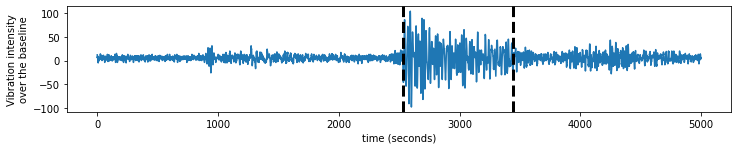

In [0]:
#very very slow
algo = rpt.Dynp(model="rbf", min_size=100).fit(eq1.acoustic_data.values[:5000])
result = algo.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:5000], [], result)
plt.ylabel("Vibration intensity\nover the baseline")
plt.xlabel("time (seconds)")
plt.show()


Figure 7: The first half of the time series in Figure 6 The same model described in Figure 6 is applied, but with the request to find 2 points of change.

**A visual inspection of the data reveals that the model finds 2 points of change that isolate a segment of the time series with the largest variance.**

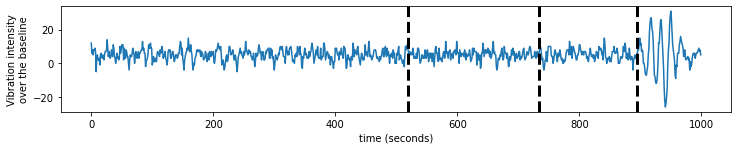

In [0]:
algo = rpt.Dynp(model="rbf", min_size=100).fit(eq1.acoustic_data.values[:1000])
result = algo.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:1000], [], result)
plt.ylabel("Vibration intensity\nover the baseline")
plt.xlabel("time (seconds)")
plt.show()


Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

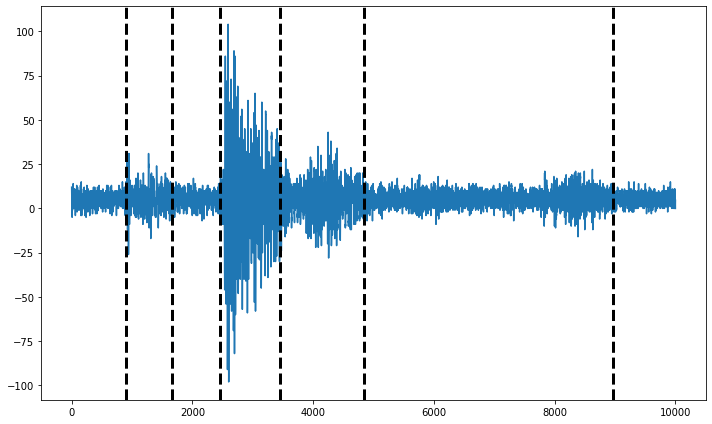

In [0]:
algo = rpt.Binseg(model="rbf").fit(eq1.acoustic_data.values[:10000])
my_bkps = algo.predict(n_bkps=6)

# show results


rpt.show.display(eq1.acoustic_data.values[:10000], [], my_bkps, figsize=(10, 6))
plt.show()

Figure 8: same as figure 7 but for Binary Segmentation model (implemented by the rupture python package). This model implements a more efficiently binary search for POCs with computational complexity O(nlog n) where n is the number of samples that can be found (POCs). This allows to search for a large number of POCs and segment the time series into 7 segments (6 POCs). 
Consideration:  the last segment in the time series that starts just before x=8000 and ends at 9000 is statistically more likely to be significant since it is surrounded by long stationary segments. The high variance of the small segments in the dirst half of the time series is more likely to be explained by, very generaically, "bad data" since the variance changes over and over again in 1000-2000 long segments. This is in fact a consequence of the binary search strategy where the global property of the time series are immediately lost after the first split. 